# Comportamiento según dispositivo de acceso.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [4]:
data = pd.read_csv('data/events.csv', low_memory = False)

## ¿Cuáles son las actividades comunes que realiza en una misma sesión un usuario según  device_type?

In [5]:
#Arreglo el tipo de dato de la columna "timestamp"
data["timestamp"] = pd.to_datetime(data["timestamp"])
# separemos las cosas para que quede algo manejable; no tiene sentido tener el timestamp todo junto
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour

In [6]:
#Se obtiene el día de la semana, se cuenta y se vuelca en un gráfico
days = {0: "Lunes",1: "Martes",2:"Miercoles",3: "Jueves",4: "Viernes",5: "Sábado",6: "Domingo"}

sorter = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado","Domingo"]
sorterIndex = dict(zip(sorter,range(len(sorter))))

data["weekday"] = data["timestamp"].dt.dayofweek
data["weekday"] = data["weekday"].apply(lambda x: days[x])

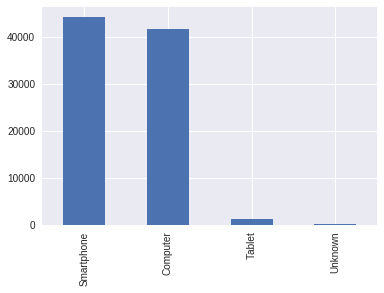

In [7]:
data.device_type.value_counts().plot(kind='bar')

In [8]:
data.groupby('device_type')['event'].value_counts().reset_index(name='cantidad')

,device_type,event,cantidad
0,Computer,visited site,41790
1,Smartphone,visited site,44239
2,Tablet,visited site,1234
3,Unknown,visited site,115


In [9]:
#Personas de las cuales se sabe si device_type:
personDeviceType = data.dropna(subset=['device_type'])

In [10]:
personDeviceType.shape

(87378, 28)

In [11]:
personDeviceType = personDeviceType.drop_duplicates(subset=['person'])

In [12]:
personDeviceType.shape

(26899, 28)

In [13]:
personDeviceType = personDeviceType[['person']]
personDeviceType.shape

(26899, 1)

Tenemos la información sobre que tipo de dispositivo se usó para entrar de 87378 usuarios

In [14]:
events = data[['person','event','year','day','month','hour','weekday','device_type']]

In [15]:
events.shape

(1011288, 8)

In [16]:
#Me quedo con los eventos que realizan quienes conocemos su device_type:
personDevice = pd.merge(events, personDeviceType, on='person',how='inner')

In [17]:
personDevice.shape

(1008799, 8)

In [18]:
personDevice.head()

,person,event,year,day,month,hour,weekday,device_type
0,0004b0a2,ad campaign hit,2018,31,5,23,Jueves,NaN
1,0004b0a2,visited site,2018,31,5,23,Jueves,Smartphone
2,0004b0a2,viewed product,2018,31,5,23,Jueves,NaN
3,0004b0a2,checkout,2018,31,5,23,Jueves,NaN
4,0006a21a,viewed product,2018,29,5,13,Martes,NaN


¿Una persona en un mismo día usa diferentes device_type?

In [54]:
len(personDevice.person.unique())

26899

In [56]:
sum(np.isnan(personDevice.day))

0

In [57]:
sum(np.isnan(personDevice.month))

0

In [58]:
sum(np.isnan(personDevice.year))

0

In [19]:
userSmartphone = personDevice[personDevice['device_type']=='Smartphone'][['person']]

In [20]:
userSmartphone.shape

(44239, 1)

In [21]:
userSmartphone = userSmartphone.drop_duplicates()

In [22]:
userSmartphone.shape

(14610, 1)

In [23]:
personDevice.shape

(1008799, 8)

In [26]:
personSmartphone = pd.merge(personDevice, userSmartphone, on='person',how='inner')

In [27]:
personSmartphone.shape

(491034, 8)

In [29]:
personSmartphone.head()

,person,event,year,day,month,hour,weekday,device_type
0,0004b0a2,ad campaign hit,2018,31,5,23,Jueves,NaN
1,0004b0a2,visited site,2018,31,5,23,Jueves,Smartphone
2,0004b0a2,viewed product,2018,31,5,23,Jueves,NaN
3,0004b0a2,checkout,2018,31,5,23,Jueves,NaN
4,0006a21a,viewed product,2018,29,5,13,Martes,NaN


In [42]:
pvEventMonth = pd.pivot_table(personSmartphone, values='event', index=['weekday'],
                     columns=['month'], aggfunc='count')

In [43]:
pvEventMonth.shape

(7, 6)

Text(69,0.5,'Hora del día')

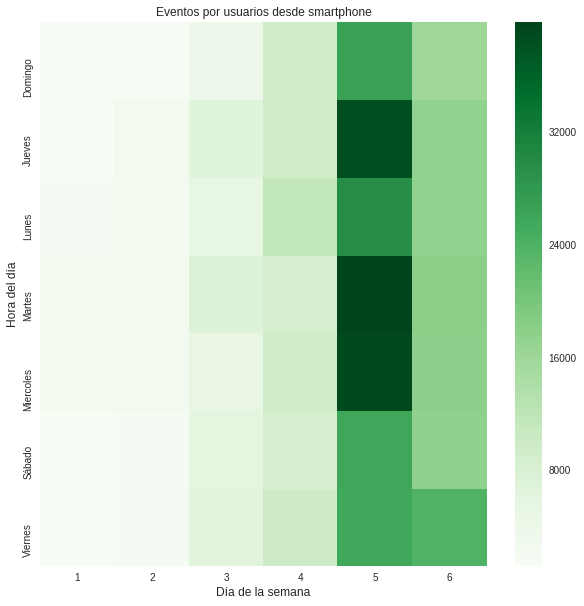

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(pvEventMonth, ax=ax, cmap="Greens")
g.set_title("Eventos por usuarios desde smartphone", fontsize=12)
g.set_xlabel("Día de la semana",fontsize=12)
g.set_ylabel("Hora del día", fontsize=12)

In [54]:
pesonSmartphone.head(1)

,person,event,year,day,month,hour,weekday,device_type
0,0004b0a2,ad campaign hit,2018,31,5,23,Jueves,NaN


In [68]:
eventDaySm = personSmartphone.groupby('weekday')['event'].value_counts().reset_index(name='cantidad')
eventDaySm.head(2)

,weekday,event,cantidad
0,Domingo,viewed product,26348
1,Domingo,visited site,5958


In [70]:
pvEventDaySm = pd.pivot_table(eventDaySm, values='cantidad', index=['weekday'],
                     columns=['event'], aggfunc=np.sum)
pvEventDaySm.head()

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
weekday,,,,,,,,,,,
Domingo,5909,4172,2022,56,5019,36,4024,5222,218,26348,5958
Jueves,7301,5759,2968,119,6321,31,4614,6041,350,35667,7655
Lunes,6547,5078,2410,103,6048,58,4497,5631,399,30528,7136
Martes,7867,5465,3001,118,6402,36,5174,5986,420,36183,7876
Miercoles,7457,5756,3013,100,6327,41,4802,6099,371,34853,7842


Text(69,0.5,'Días de la semana')

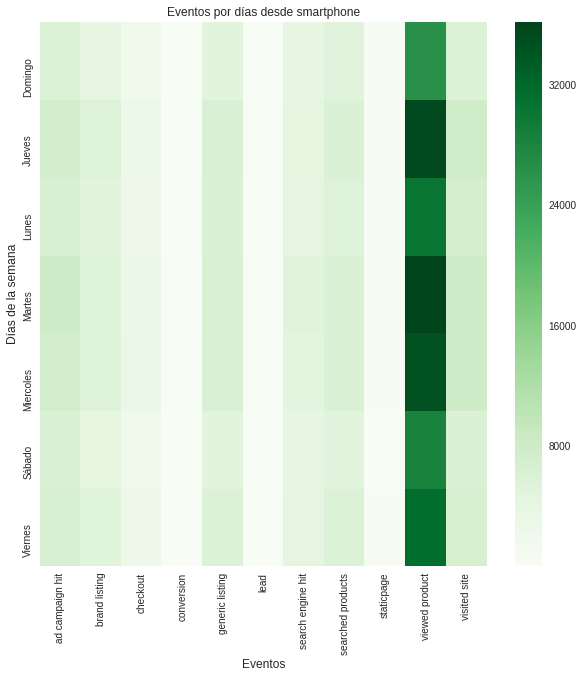

In [72]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(pvEventDaySm, ax=ax, cmap="Greens")
g.set_title("Eventos por días desde smartphone", fontsize=12)
g.set_xlabel("Eventos",fontsize=12)
g.set_ylabel("Días de la semana", fontsize=12)

Text(69,0.5,'Días de la semana')

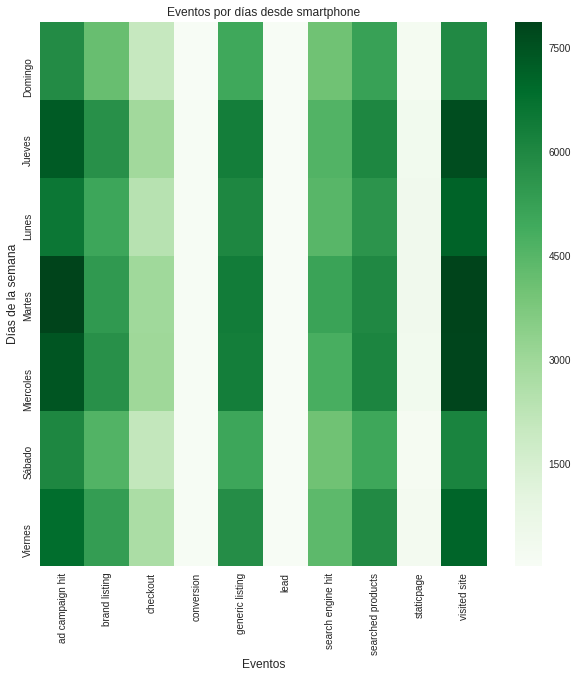

In [82]:
eventDaySm = eventDaySm[eventDaySm['event']!= 'viewed product']
pvEventDaySm = pd.pivot_table(eventDaySm, values='cantidad', index=['weekday'],
                     columns=['event'], aggfunc=np.sum)

fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(pvEventDaySm, ax=ax, cmap="Greens")
g.set_title("Eventos por días desde smartphone", fontsize=12)
g.set_xlabel("Eventos",fontsize=12)
g.set_ylabel("Días de la semana", fontsize=12)

In [73]:
data.device_type.value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

Text(69,0.5,'Días de la semana')

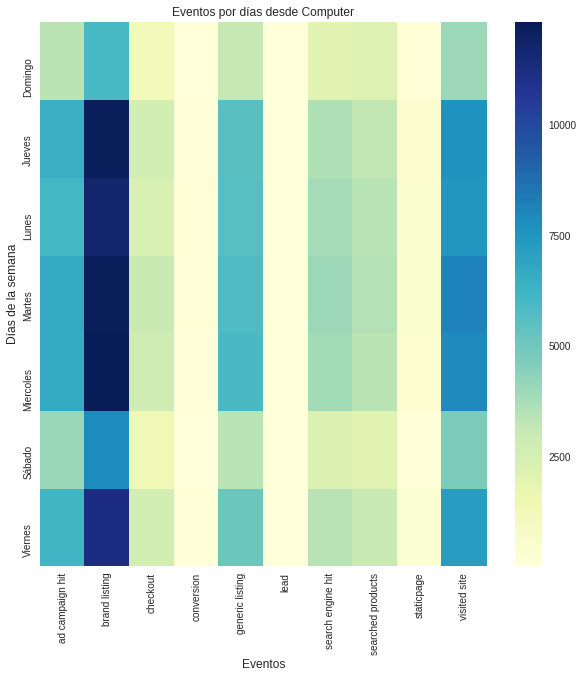

In [79]:
userComputer = personDevice[personDevice['device_type']=='Computer'][['person']]
userComputer = userComputer.drop_duplicates()
personComputer = pd.merge(personDevice, userComputer, on='person',how='inner')
eventDayCom = personComputer.groupby('weekday')['event'].value_counts().reset_index(name='cantidad')
eventDayCom = eventDayCom[eventDayCom['event']!= 'viewed product']
pvEventDayCom = pd.pivot_table(eventDayCom, values='cantidad', index=['weekday'],
                     columns=['event'], aggfunc=np.sum)
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(pvEventDayCom, ax=ax, cmap="YlGnBu")
g.set_title("Eventos por días desde Computer", fontsize=12)
g.set_xlabel("Eventos",fontsize=12)
g.set_ylabel("Días de la semana", fontsize=12)

In [77]:
data.event.unique()

array(['ad campaign hit', 'visited site', 'viewed product', 'checkout',
       'generic listing', 'search engine hit', 'brand listing',
       'searched products', 'conversion', 'staticpage', 'lead'],
      dtype=object)

Text(69,0.5,'Días de la semana')

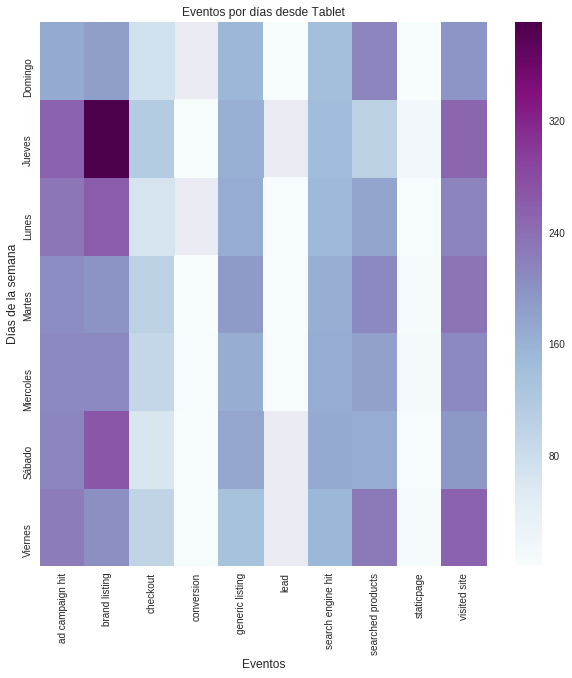

In [83]:
userTablet  = personDevice[personDevice['device_type']=='Tablet'][['person']]
userTablet  = userTablet.drop_duplicates()
personTablet = pd.merge(personDevice, userTablet , on='person',how='inner')
eventDayTablet  = personTablet .groupby('weekday')['event'].value_counts().reset_index(name='cantidad')
eventDayTablet = eventDayTablet[eventDayTablet['event']!= 'viewed product']
pvEventDayTablet  = pd.pivot_table(eventDayTablet , values='cantidad', index=['weekday'],
                     columns=['event'], aggfunc=np.sum)
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(pvEventDayTablet, ax=ax, cmap="BuPu")
g.set_title("Eventos por días desde Tablet", fontsize=12)
g.set_xlabel("Eventos",fontsize=12)
g.set_ylabel("Días de la semana", fontsize=12)

Todo lo que sigue depsues de aca fueron intentos de cosas feas

In [48]:
pv = pd.pivot_table(smartphone, values='cantidad', index=['month'],
                     columns=['event'], aggfunc=np.sum)

In [49]:
pv.head()

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
month,,,,,,,,,,,
1,1125,903,236,36,1296,22,729,1164,97,5376,1534
2,1482,1320,276,54,1337,7,912,1165,71,7115,1825
3,4180,3630,844,155,3686,49,2246,2999,338,18496,4449
4,6440,6362,1123,196,6443,92,3742,5174,413,30494,7505
5,21719,16418,8381,186,18112,50,14773,18213,851,104594,22267


Text(69,0.5,'Hora del día')

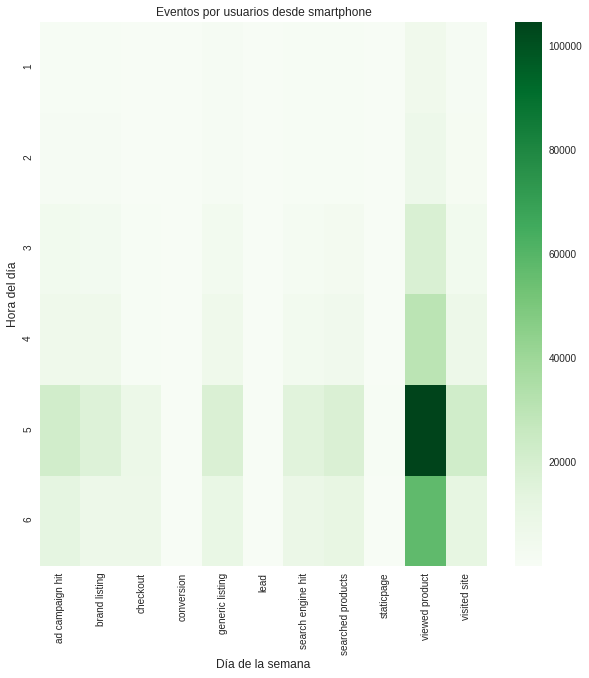

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(pv, ax=ax, cmap="Greens")
g.set_title("Eventos por usuarios desde smartphone", fontsize=12)
g.set_xlabel("Día de la semana",fontsize=12)
g.set_ylabel("Hora del día", fontsize=12)

In [128]:
pv.agg('sum').reset_index(name='cantidad')

,event,cantidad
0,ad campaign hit,47962.0
1,brand listing,36182.0
2,checkout,18228.0
3,conversion,652.0
4,generic listing,41030.0
5,lead,265.0
6,search engine hit,31550.0
7,searched products,39947.0
8,staticpage,2172.0
9,viewed product,223366.0


In [97]:
pv.head()

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
person,,,,,,,,,,,
0004b0a2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
0006a21a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
0019c395,2.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0
001f1653,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
00269e77,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0


In [ ]:
sns.heatmap(pv, annot=True)

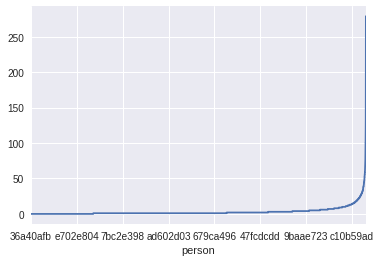

In [126]:

pv['ad campaign hit'].sort_values().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa3267d8c>]],
      dtype=object)

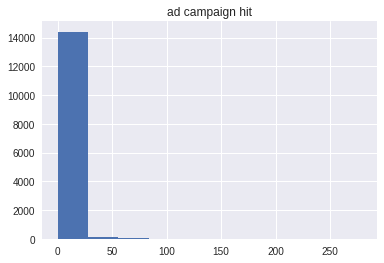

In [104]:
pv[['ad campaign hit']].hist()

In [114]:
names = pv.columns

In [109]:
x1 = list(pv['ad campaign hit'])
x2 = list(pv['brand listing'])
x3 = list(pv['checkout'])
x4 = list(pv['conversion']),
x5 = list(pv['generic listing'])

In [118]:
colours = [ '#E69F00' , '#56B4E9' , '#F0E442' , '#009E73' , '#D55E00' ]

/home/july/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


([array([3.06892013e-03, 6.31811720e-06, 1.05301953e-06, 2.10603907e-07,
         4.21207813e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
  array([6.13194335e-03, 1.53740852e-05, 3.79087032e-06, 1.26362344e-06,
         1.05301953e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.10603907e-07, 0.00000000e+00, 0.00000000e+00, 2.10603907e-07]),
  array([9.20886642e-03, 1.53740852e-05, 3.79087032e-06, 1.26362344e-06,
         1.05301953e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.10603907e-07, 0.00000000e+00, 0.00000000e+00, 2.10603907e-07]),
  array([1.22857895e-02, 1.53740852e-05, 3.79087032e-06, 1.26362344e-06,
         1.05301953e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.10603907e-07, 0.00000000e+00, 0.00000000e+00, 2.10603907e-07]),
  array([1.53551308e-02, 2.16922024e-05, 4.63328595e-06, 1.26362344e-06,
         1.26362344e-06, 0.00000000e+00, 2.

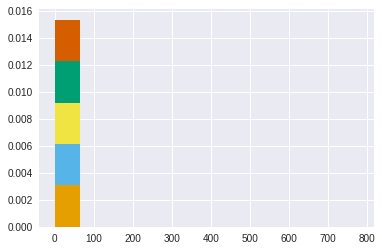

In [120]:
plt.hist ([x1, x2, x3, x4, x5], bins = int (180/15), stacked = True, 
         normed = True, color = colours, label = names)

/home/july/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


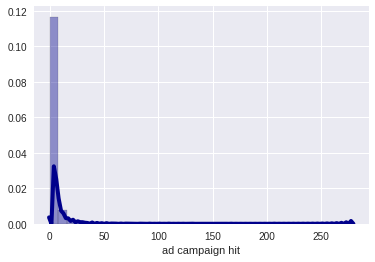

In [106]:
# Gráfico de densidad e histograma de todos los retrasos de llegada 
sns.distplot (pv['ad campaign hit'], hist = True, kde = True, 
             bins = int (180/5), color = 'darkblue', hist_kws = {'edgecolor': 'black'}, 
             kde_kws = {'linewidth': 4})